In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import make_regression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer as knn
from sklearn.datasets import make_multilabel_classification
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,max_error,mean_absolute_error,accuracy_score
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC  

In [3]:
train = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [4]:
train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [5]:
test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [6]:
train.isnull().sum()
len(train[train.isna().any(axis=1)])

2923

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  Month_SeasonalPurchase           6541 non-null   object 
 11  OS                               6537 non-null   float64
 12  SearchEngine        

In [9]:
train.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [10]:
test.isnull().sum()

HomePage                           51
HomePage_Duration                  55
LandingPage                        56
LandingPage_Duration               75
ProductDescriptionPage             58
ProductDescriptionPage_Duration    63
GoogleMetric:Bounce Rates          66
GoogleMetric:Exit Rates            51
GoogleMetric:Page Values           45
SeasonalPurchase                   45
Month_SeasonalPurchase             58
OS                                 62
SearchEngine                       58
Zone                               47
Type of Traffic                    68
CustomerType                       88
Gender                             64
Cookies Setting                    62
Education                          69
Marital Status                     47
WeekendPurchase                    58
dtype: int64

In [11]:
dtype_numerical = ['HomePage',
 'HomePage_Duration',
 'LandingPage',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Exit Rates',
 'GoogleMetric:Page Values',
 'SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type of Traffic',
 'WeekendPurchase']

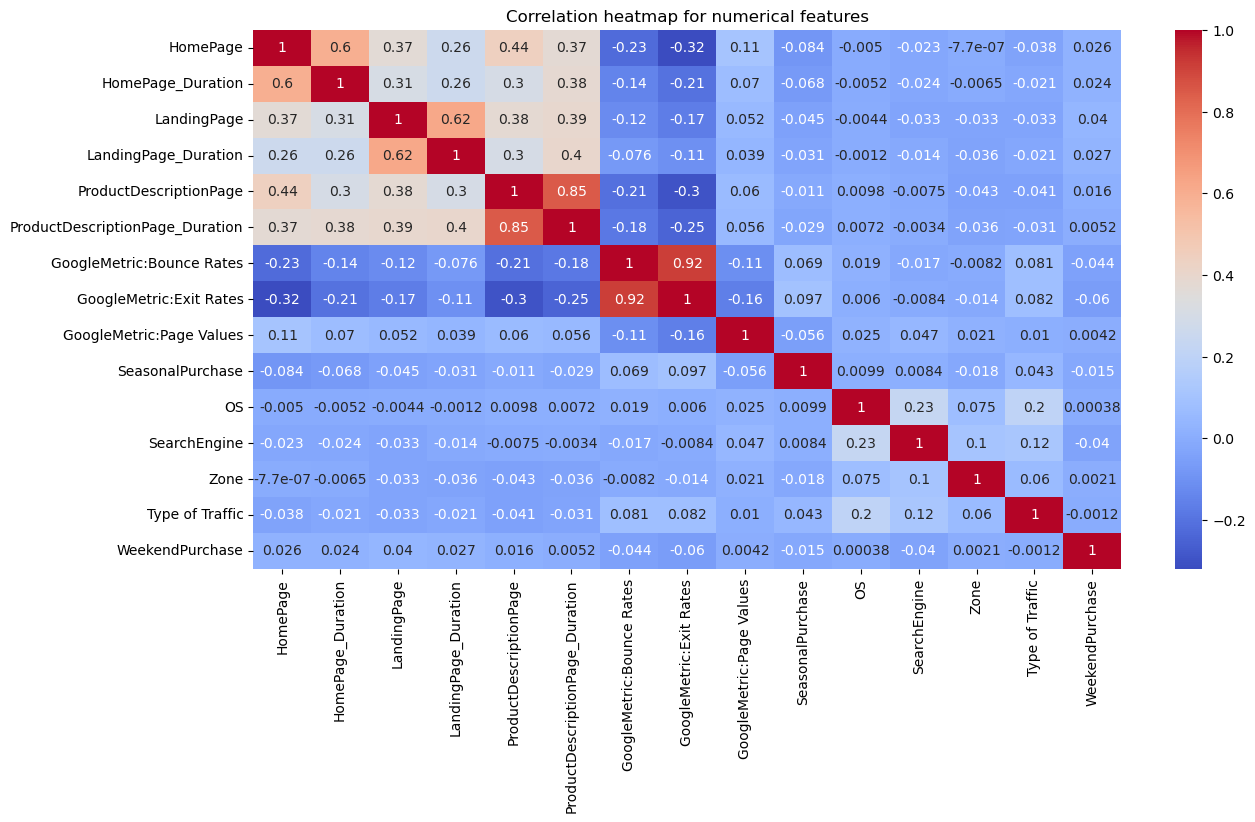

In [12]:
plt.figure(figsize=(14,7))

sns.heatmap(train[dtype_numerical].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation heatmap for numerical features")
plt.show()

In [13]:
#train.drop(["HomePage", "LandingPage_Duration", "ProductDescriptionPage_Duration", "GoogleMetric:Exit Rates"], axis=1, inplace=True)

In [14]:
#test.drop(["HomePage", "LandingPage_Duration", "ProductDescriptionPage_Duration", "GoogleMetric:Exit Rates"], axis=1, inplace=True)

In [15]:
#to_remove = ["HomePage", "LandingPage_Duration", "ProductDescriptionPage_Duration", "GoogleMetric:Exit Rates"]
#dtype_numerical = [_ for _ in dtype_numerical if _ not in to_remove]

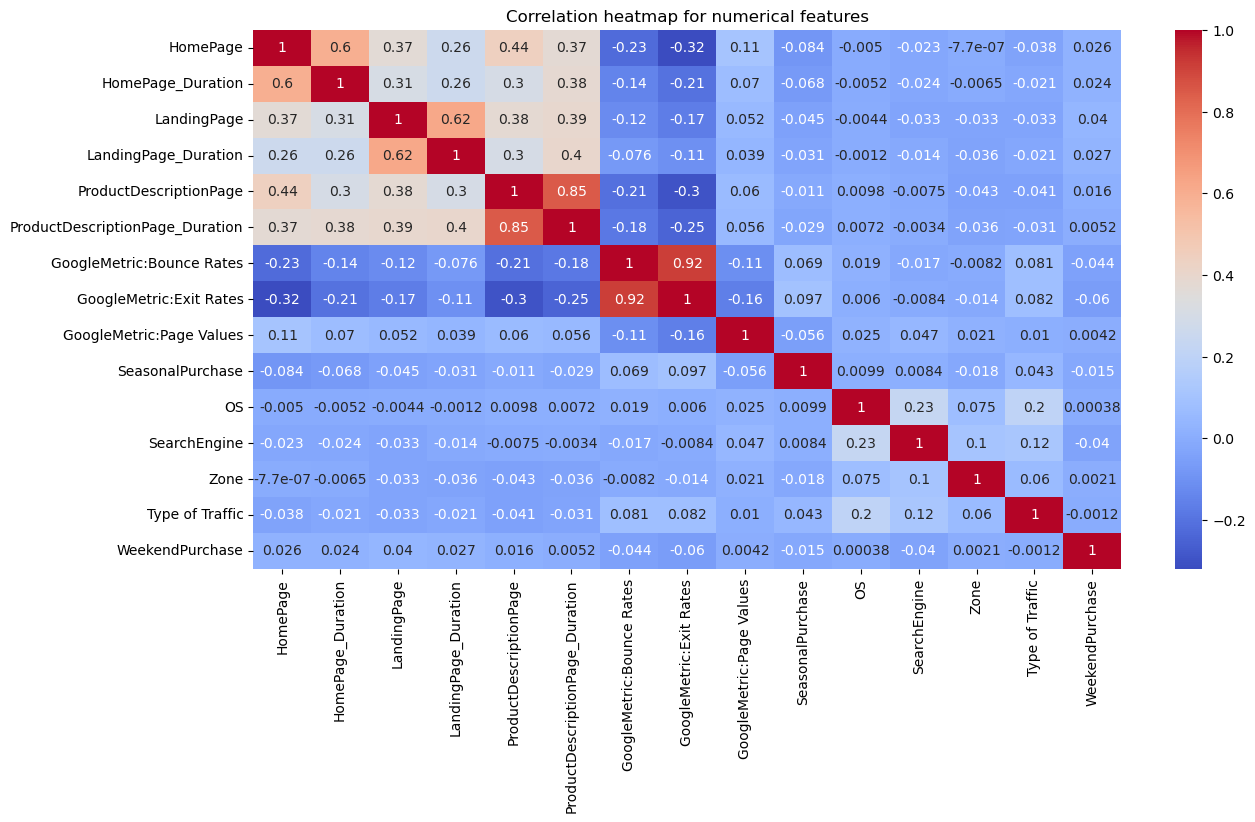

In [16]:
plt.figure(figsize=(14,7))

sns.heatmap(train[dtype_numerical].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation heatmap for numerical features")
plt.show()

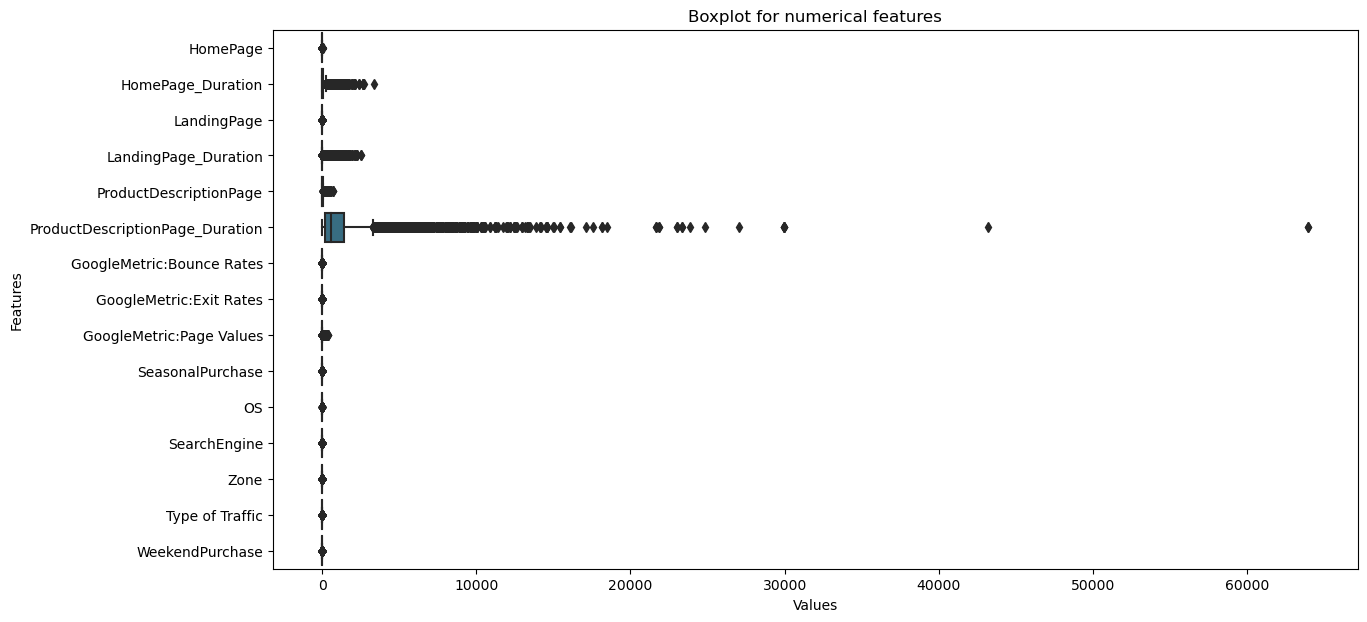

In [17]:
plt.figure(figsize=(14, 7))
sns.boxplot(data= train[dtype_numerical], orient='horizontal', palette= 'viridis')
plt.title("Boxplot for numerical features")
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

In [18]:
'''
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df_boston[‘DIS’]>=upper)
# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_boston[‘DIS’]<=lower)
# Removing the outliers
df_boston.drop(upper_array[0],inplace=True)
df_boston.drop(lower_array[0],inplace=True)
 
print("New Shape: ", df_boston.shape)'''

'\n# IQR\nQ1 = np.percentile(df_boston[\'DIS\'], 25,\n                   interpolation = \'midpoint\')\n \nQ3 = np.percentile(df_boston[\'DIS\'], 75,\n                   interpolation = \'midpoint\')\nIQR = Q3 - Q1\n \nprint("Old Shape: ", df_boston.shape)\n \n# Upper bound\nupper=Q3+1.5*IQR\nupper_array=np.array(df_boston[‘DIS’]>=upper)\n# Lower bound\nlower=Q1-1.5*IQR\nlower_array=np.array(df_boston[‘DIS’]<=lower)\n# Removing the outliers\ndf_boston.drop(upper_array[0],inplace=True)\ndf_boston.drop(lower_array[0],inplace=True)\n \nprint("New Shape: ", df_boston.shape)'

In [19]:
'''for c in train:
    if train[c].dtype == 'object':
        modevalue = train[c].mode()[0]
        train[c].fillna(modevalue, inplace = True)'''

"for c in train:\n    if train[c].dtype == 'object':\n        modevalue = train[c].mode()[0]\n        train[c].fillna(modevalue, inplace = True)"

In [20]:
'''for col in test:
    if test[col].dtype == 'object':
        modevalue = test[col].mode()[0]
        test[col].fillna(modevalue, inplace = True)'''

"for col in test:\n    if test[col].dtype == 'object':\n        modevalue = test[col].mode()[0]\n        test[col].fillna(modevalue, inplace = True)"

In [21]:
'''imputer = knn(n_neighbors=10)
train[dtype_numerical] = imputer.fit_transform(train[dtype_numerical])'''

'imputer = knn(n_neighbors=10)\ntrain[dtype_numerical] = imputer.fit_transform(train[dtype_numerical])'

In [22]:
'''imputer = knn(n_neighbors=10)
test[dtype_numerical] = imputer.fit_transform(test[dtype_numerical])'''

'imputer = knn(n_neighbors=10)\ntest[dtype_numerical] = imputer.fit_transform(test[dtype_numerical])'

In [23]:
#train_encoded = pd.get_dummies(train, columns = ['Month_SeasonalPurchase' , 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status'])

In [24]:
#test_encoded = pd.get_dummies(test, columns = ['Month_SeasonalPurchase' , 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status'])

In [25]:
'''X = train_encoded.drop('Made_Purchase', axis = 1)
y = train_encoded['Made_Purchase']'''

"X = train_encoded.drop('Made_Purchase', axis = 1)\ny = train_encoded['Made_Purchase']"

In [26]:
'''sm = SMOTE(random_state = 42)
x_oversample, y_oversample = sm.fit_resample(X, y)'''

'sm = SMOTE(random_state = 42)\nx_oversample, y_oversample = sm.fit_resample(X, y)'

In [27]:
#X_train, X_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size =0.2 ,random_state = 42 )

In [28]:
#lr = LogisticRegression(max_iter = 10000)
#lr.fit(X_train, y_train)

In [29]:
#x_oversample.info()

In [30]:
#X_test.info()

In [31]:
#y_prediction = lr.predict(X_test)

In [32]:
'''from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(lr, param_grid = {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs', 'newton_cg']})
gs.fit(X_train, y_train)'''

"from sklearn.model_selection import GridSearchCV\ngs = GridSearchCV(lr, param_grid = {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs', 'newton_cg']})\ngs.fit(X_train, y_train)"

In [33]:
#gs.best_score_

In [34]:
'''y_prediction=gs.predict(test_encoded)
y_prediction_csv=pd.DataFrame({"id":test_encoded.index,"Made_Purchase":y_prediction})
y_prediction_csv.to_csv('submission.csv',index=False)'''

'y_prediction=gs.predict(test_encoded)\ny_prediction_csv=pd.DataFrame({"id":test_encoded.index,"Made_Purchase":y_prediction})\ny_prediction_csv.to_csv(\'submission.csv\',index=False)'

In [35]:
features=train.drop("Made_Purchase",axis=1)
target=train['Made_Purchase'].copy()
features

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,4.0,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,3.0,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,2.0,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,3.0,2.0,6.0,3.0,Returning_Visitor,Female,Deny,NaN,Married,0.0
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.0
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,2.0,4.0,4.0,1.0,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.0


In [36]:
dtype_categorical=['Month_SeasonalPurchase','CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status']

In [37]:
step_1=Pipeline([('imputer',knn(n_neighbors=2)),('SS', StandardScaler())])

step_3=Pipeline([('imputer', SimpleImputer(strategy="most_frequent")),('OE', OrdinalEncoder())])

full_pipeline = ColumnTransformer([('step1',step_1,dtype_numerical),('step3',step_3,dtype_categorical)])
set_config(display='diagram')   
full_pipeline

trainer=full_pipeline.fit_transform(features)
trainer.shape

(14731, 21)

In [38]:
tester=full_pipeline.fit_transform(test)#test encoded
tester.shape

(6599, 21)

In [39]:
rf = RandomForestClassifier(n_estimators= 200)


In [40]:
xgb = XGBClassifier(scale_pos_weight=(len(target) - sum(target))/sum(target),
                        learning_rate=0.01, 
                        n_estimators=100, 
                        max_depth=3, 
                        min_child_weight=7,
                        gamma=0.1, 
                        subsample=0.7, 
                        colsample_bytree=0.8, 
                        objective='binary:logistic', 
                        eval_metric='auc',
                        nthread=4, 
                        seed=42)

In [41]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)

In [42]:
lr = LogisticRegression(max_iter = 10000)

In [43]:
knnclassif=KNeighborsClassifier(n_neighbors=5)

In [44]:
#gs = GridSearchCV(lr, param_grid = {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'lbfgs', 'newton_cg']})

In [45]:
svm = SVC(kernel='linear') 

In [46]:

stack = [('gb', gb), ('rf', rf), ('xgb', xgb)]
clf = StackingClassifier(estimators=stack, final_estimator=lr)
clf.fit(trainer,target)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=0.5,
                                                           max_depth=2,
                                                           max_features=2,
                                                           n_estimators=20,
                                                           random_state=42)),
                               ('rf', RandomForestClassifier(n_estimators=200)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8,
                                              early_stopping_rounds=None,
                                              e...
                                              interaction_constraints=None,
                                              learning_rate=0.01, max_bin=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=7, missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              nthread=4, num_parallel_tree=None,
                                              predictor=None, random_state=None,
                                              reg_alpha=None, ...))],
                   final_estimator=LogisticRegression(max_iter=10000))

In [47]:
data=clf.predict(tester)
val=clf.predict(trainer)

In [48]:
score=accuracy_score(target,val)
print(score,len(data))

0.22992329101893966 6599


In [49]:
res=pd.DataFrame(columns=['id','Made_Purchase'])
res['id']=[i for i in range(len(data))]
res['Made_Purchase']=data
res.to_csv('submission.csv',index=False)